## Rodrigo Xavier
## Matrícula 569037

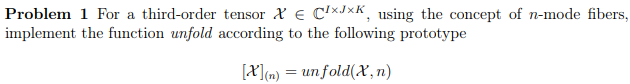

In [5]:
import numpy as np

def unfold(X, mode):
    """
    Unfold a third-order tensor X into a matrix along the specified mode.

    Parameters:
    - X: numpy.ndarray
        Input tensor of shape (I, J, K).
    - mode: int
        The mode to unfold along (1, 2, or 3).

    Returns:
    - numpy.ndarray
        The unfolded matrix.
    """
    if mode == 1:
        return X.reshape(X.shape[0], -1, order='F')
    elif mode == 2:
        return X.transpose(1, 0, 2).reshape(X.shape[1], -1, order='F')
    elif mode == 3:
        return X.transpose(2, 0, 1).reshape(X.shape[2], -1, order='F')
    else:
        raise ValueError("Mode must be 1, 2, or 3.")

In [6]:
from scipy.io import loadmat

# Testing with Practice 6 matrix:
mat_file = loadmat(r"C:\Users\Administrador\Documents\Doutorado\Algebra tensorial\Homeworks\Arquivos\data_homework_6\data_homework_6\Practice_5_unfolding_folding.mat")

X = mat_file['tenX']
X1 = mat_file['X1']
X2 = mat_file['X2']
X3 = mat_file['X3']

X1_test = unfold(X, 1)
X2_test = unfold(X, 2)
X3_test = unfold(X, 3)

# Validating
print(f'X1_test = X1: {np.allclose(X1, X1_test)}')
print(f'X2_test = X2: {np.allclose(X2, X2_test)}')
print(f'X3_test = X2: {np.allclose(X3, X3_test)}')

X1_test = X1: True
X2_test = X2: True
X3_test = X2: True


# 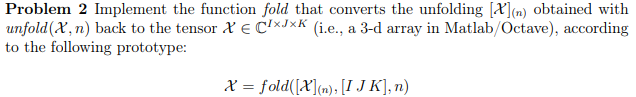

In [7]:
import numpy as np

def fold(unfolded_matrix, original_shape, n_mode):
    """
    Reconstructs a 3D tensor from its n-mode unfolded matrix.

    Parameters:
        unfolded_matrix (numpy.ndarray): The unfolded matrix.
        original_shape (tuple): The shape of the original tensor.
        n_mode (int): The mode (1, 2, or 3) that was used for unfolding.

    Returns:
        numpy.ndarray: The reconstructed tensor.
    """
    if n_mode == 1:
        return unfolded_matrix.reshape(original_shape, order='F')  # 'F' for fu**ing Fortran order ¬¬"

    elif n_mode == 2:
    
        # 1. Reshape to (original_shape[1], -1, original_shape[2])
        temp = unfolded_matrix.reshape((original_shape[1], -1, original_shape[2]), order='F')
        
        # 2. Transpose to (original_shape[1], original_shape[0], original_shape[2])
        return temp.transpose(1, 0, 2)

    elif n_mode == 3:
        
        # 1. Reshape to (original_shape[2], original_shape[0], -1)
        temp = unfolded_matrix.reshape((original_shape[2], original_shape[0], -1), order='F')
        
        # 2. Transpose to (original_shape[0], original_shape[1], original_shape[2])
        return temp.transpose(1, 2, 0)

    else:
        raise ValueError("Mode must be 1, 2, or 3.")

In [32]:
X1_folded = fold(X1_test, original_shape=X.shape, n_mode=1)
X2_folded = fold(X2_test, original_shape=X.shape, n_mode=2)
X3_folded = fold(X3_test, original_shape=X.shape, n_mode=3)

In [33]:
print(f'Original X shape: {X.shape}')
print(f'Folded 1-mode X shape: {X1_folded.shape}')
print(f'Folded 2-mode shape: {X2_folded.shape}')
print(f'Folded 3-mode shape: {X3_folded.shape}')

Original X shape: (3, 4, 5)
Folded 1-mode X shape: (3, 4, 5)
Folded 2-mode shape: (3, 4, 5)
Folded 3-mode shape: (3, 4, 5)


Dimensões dos tensores batem, mas e os valores?

In [34]:
# Validating
print(f'X1_folded = X: {np.allclose(X1_folded, X)}')
print(f'X2_folded = X: {np.allclose(X2_folded, X)}')
print(f'X3_folded = X: {np.allclose(X3_folded, X)}')

X1_folded = X: True
X2_folded = X: True
X3_folded = X: True


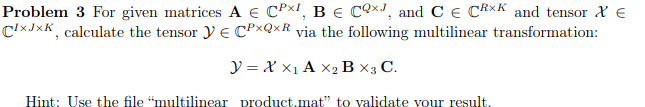

In [18]:
import numpy as np

def multilinear_product(X, A, B, C):
    from fold_unfold import (fold,unfold)
    """
    Performs the multilinear transformation Y = X x1 A x2 B x3 C using fold and unfold.

    Args:
        X: array representing the tensor X (NumPy).
        A: array representing the matrix A (NumPy).
        B: array representing the matrix B (NumPy).
        C: array representing the matrix C (NumPy).

    Returns:
        NumPy array representing the transformed tensor Y.
    """

    I, J, K = X.shape  # Get dimensions of X

    # 1. Unfold X along the first mode (X_1)
    X_1 = unfold(X, 1)

    # 2. Multiply with A
    Y_1 = np.dot(A, X_1)

    # 3. Fold back to create an intermediate tensor (Y_temp)
    Y_temp = fold(Y_1, (A.shape[0], J, K), 1)  # Fold back to (P, J, K)

    # 4. Unfold Y_temp along the second mode (Y_temp_2)
    Y_temp_2 = unfold(Y_temp, 2)

    # 5. Multiply with B
    Y_2 = np.dot(B, Y_temp_2)

    # 6. Fold back
    Y_double_temp = fold(Y_2, (A.shape[0], B.shape[0], K), 2)  # Fold back to (P, Q, K)

    # 7. Unfold Y_double_temp along the third mode
    Y_double_temp_3 = unfold(Y_double_temp, 3)

    # 8. Multiply with C
    Y_3 = np.dot(C, Y_double_temp_3)

    # 9. Fold back to get the final tensor Y
    Y = fold(Y_3, (A.shape[0], B.shape[0], C.shape[0]), 3)  # Fold back to (P, Q, R)

    return Y

In [19]:
from scipy.io import loadmat

# Testing with Practice 6 matrix:
mat_file = loadmat(r"C:\Users\Administrador\Documents\Doutorado\Algebra tensorial\Homeworks\matlab files\multilinear_product.mat")
A = mat_file['A']
B = mat_file['B']
C = mat_file['C']
X = mat_file['tenX']
Y = mat_file['tenY']

In [21]:
Y_hat = multilinear_product(X, A, B, C)

In [23]:
print(Y.shape)
print(Y_hat.shape)

(4, 5, 3)
(4, 5, 3)


In [25]:
print('Verificando Resultados da operação')
print(f'Y_hat = Y: {np.allclose(Y_hat, Y)}')

Verificando Resultados da operação
Y_hat = Y: True
